In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv("D:/CI/playground-series-s4e3/train.csv")
test = pd.read_csv("D:/CI/playground-series-s4e3/test.csv")
submission = pd.read_csv("D:/CI/playground-series-s4e3/sample_submission.csv")

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
train

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [8]:
train.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [10]:
test

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,32028,1101,1116,447943,447992,313,32,37,21603,79,103,1353,0,1,70,0.2853,0.3050,0.2339,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894
12810,32029,1289,1306,3149494,3149542,59,9,18,5249,113,141,1362,0,1,40,0.0106,0.2778,0.2778,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954
12811,32030,41,210,1587535,1587191,16584,796,522,1858162,24,143,1400,0,1,40,0.0557,0.5644,0.9371,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000
12812,32031,1329,1340,702237,702267,386,43,34,36875,66,124,1364,0,1,40,0.0133,0.1814,0.1539,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844


In [11]:
test.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12814 non-null  int64  
 1   X_Minimum              12814 non-null  int64  
 2   X_Maximum              12814 non-null  int64  
 3   Y_Minimum              12814 non-null  int64  
 4   Y_Maximum              12814 non-null  int64  
 5   Pixels_Areas           12814 non-null  int64  
 6   X_Perimeter            12814 non-null  int64  
 7   Y_Perimeter            12814 non-null  int64  
 8   Sum_of_Luminosity      12814 non-null  int64  
 9   Minimum_of_Luminosity  12814 non-null  int64  
 10  Maximum_of_Luminosity  12814 non-null  int64  
 11  Length_of_Conveyer     12814 non-null  int64  
 12  TypeOfSteel_A300       12814 non-null  int64  
 13  TypeOfSteel_A400       12814 non-null  int64  
 14  Steel_Plate_Thickness  12814 non-null  int64  
 15  Ed

In [13]:
    submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...
12809,32028,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12810,32029,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12811,32030,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12812,32031,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [14]:
from scipy import stats
import statsmodels.stats.diagnostic as diag

In [15]:
train.drop('id', axis=1,inplace=True)
test.drop('id', axis=1,inplace=True)

In [16]:
for col in test:
    noise = diag.acorr_ljungbox(train[col], lags=None, boxpierce=True, model_df=0, period=None, return_df=True)
    print('train ',col)
    print(noise.iloc[0])
    noise = diag.acorr_ljungbox(test[col], lags=None, boxpierce=True, model_df=0, period=None, return_df=True)
    print('test ',col)
    print(noise.iloc[0])

train  X_Minimum
lb_stat      0.511864
lb_pvalue    0.474333
bp_stat      0.511784
bp_pvalue    0.474368
Name: 1, dtype: float64
test  X_Minimum
lb_stat      1.659636
lb_pvalue    0.197652
bp_stat      1.659248
bp_pvalue    0.197705
Name: 1, dtype: float64
train  X_Maximum
lb_stat      0.765324
lb_pvalue    0.381668
bp_stat      0.765204
bp_pvalue    0.381705
Name: 1, dtype: float64
test  X_Maximum
lb_stat      1.451319
lb_pvalue    0.228316
bp_stat      1.450980
bp_pvalue    0.228371
Name: 1, dtype: float64
train  Y_Minimum
lb_stat      0.066587
lb_pvalue    0.796372
bp_stat      0.066577
bp_pvalue    0.796388
Name: 1, dtype: float64
test  Y_Minimum
lb_stat      1.496780
lb_pvalue    0.221167
bp_stat      1.496430
bp_pvalue    0.221221
Name: 1, dtype: float64
train  Y_Maximum
lb_stat      0.027966
lb_pvalue    0.867189
bp_stat      0.027961
bp_pvalue    0.867200
Name: 1, dtype: float64
test  Y_Maximum
lb_stat      0.975212
lb_pvalue    0.323384
bp_stat      0.974983
bp_pvalue    0.323

In [17]:

train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


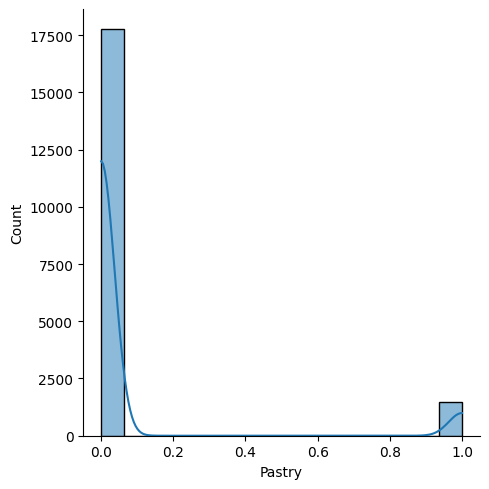

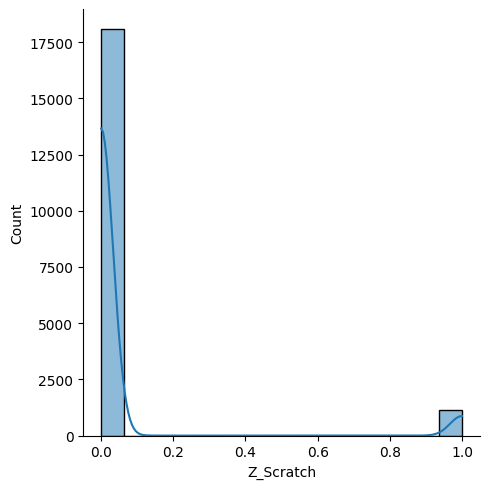

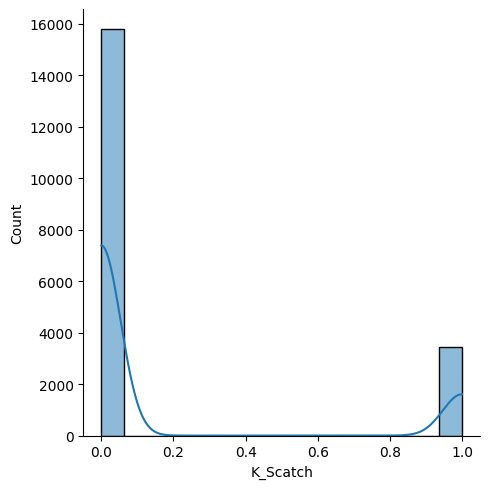

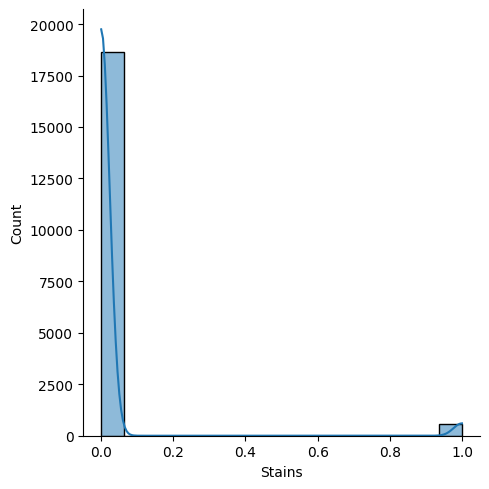

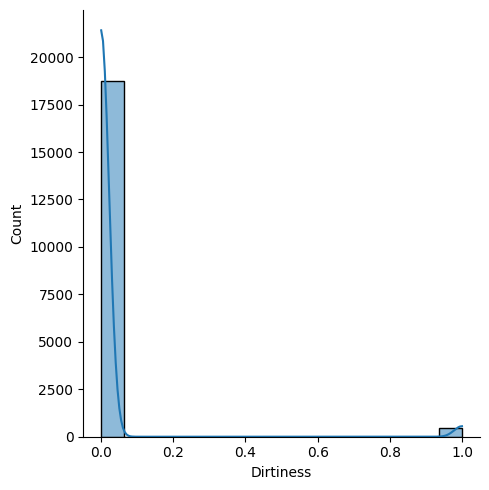

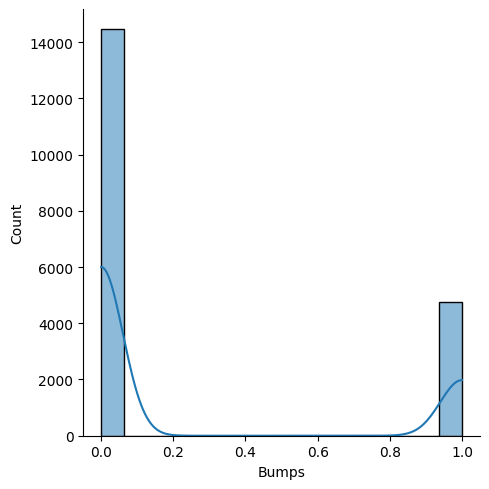

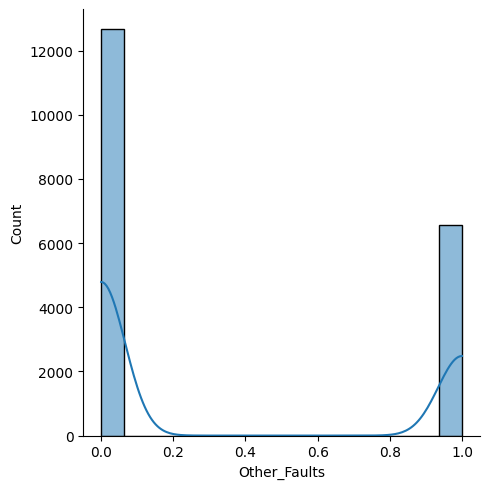

In [18]:
for col in train.iloc[:,-7:]:
    sns.displot(train[col], kde=True)

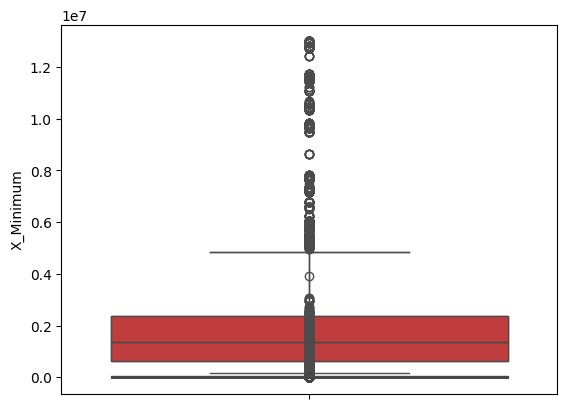

In [19]:
for col in test.columns[:-7]: 
    sns.boxplot(test[col])

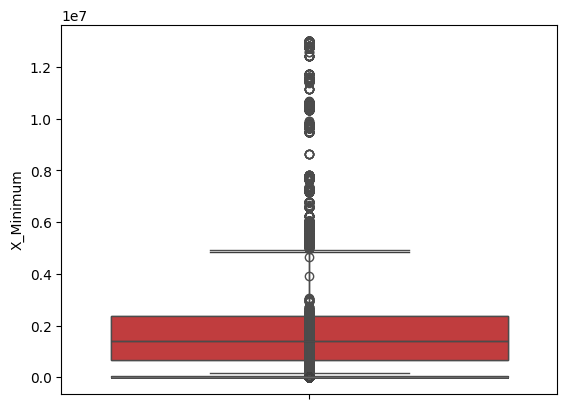

In [20]:
for col in train.columns[:-7]: 
    sns.boxplot(train[col])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = train.iloc[:,:-7]
y = train.iloc[:,-7:]
X_test = test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((15375, 27), (15375, 7), (3844, 27), (3844, 7))

In [24]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
n_estimators = 5
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=n_estimators, random_state=42))
model.fit(X_train, y_train)
print("Training accuracy:", model.score(X_train, y_train))


Training accuracy: 0.9134959349593496


In [26]:
y_pred = model.predict(X_test)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

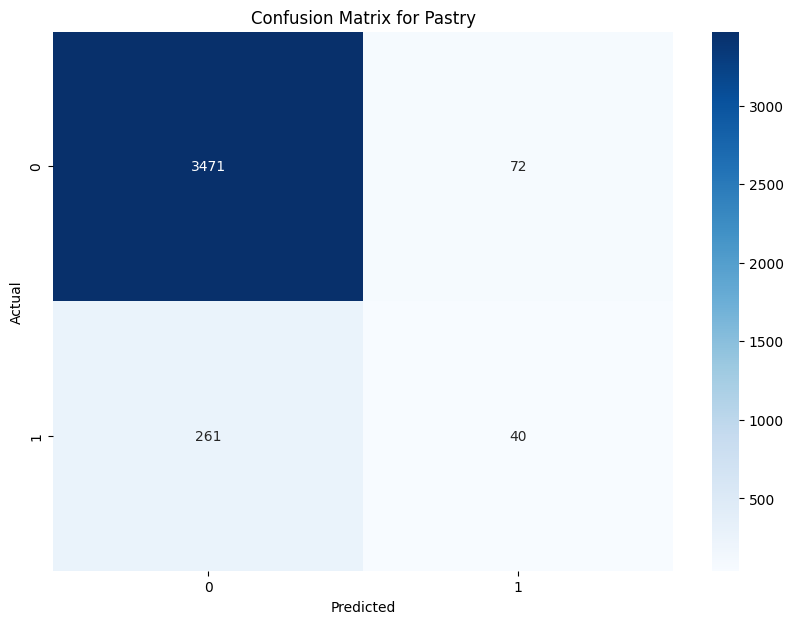

Classification Report for Pastry:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3543
           1       0.36      0.13      0.19       301

    accuracy                           0.91      3844
   macro avg       0.64      0.56      0.57      3844
weighted avg       0.89      0.91      0.89      3844



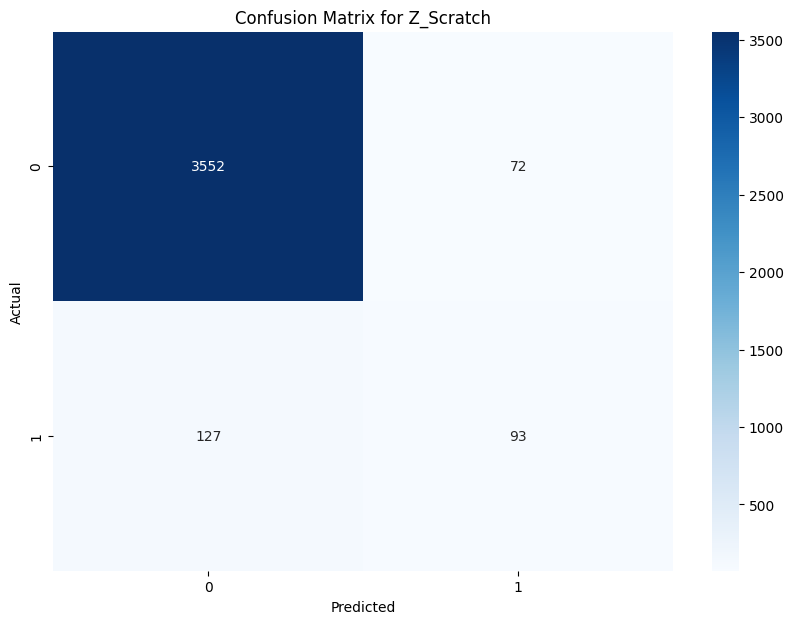

Classification Report for Z_Scratch:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3624
           1       0.56      0.42      0.48       220

    accuracy                           0.95      3844
   macro avg       0.76      0.70      0.73      3844
weighted avg       0.94      0.95      0.94      3844



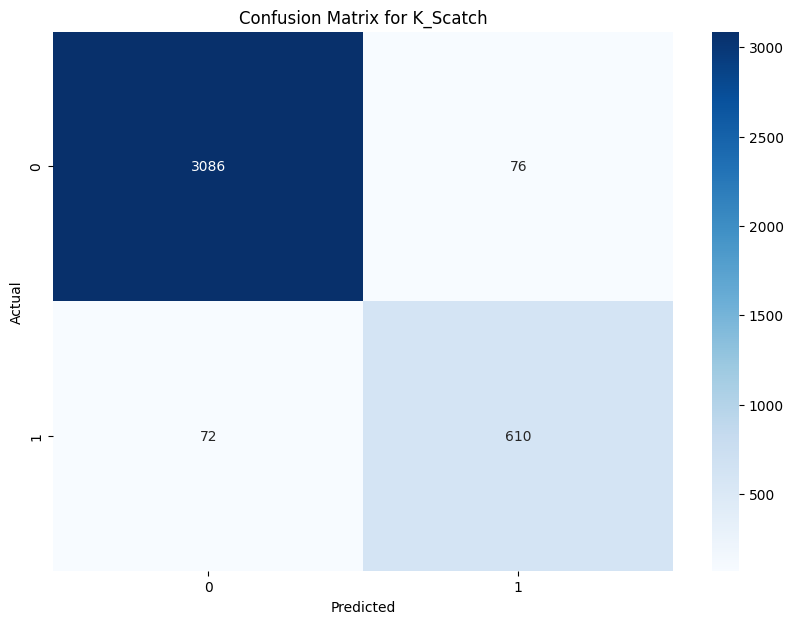

Classification Report for K_Scatch:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3162
           1       0.89      0.89      0.89       682

    accuracy                           0.96      3844
   macro avg       0.93      0.94      0.93      3844
weighted avg       0.96      0.96      0.96      3844



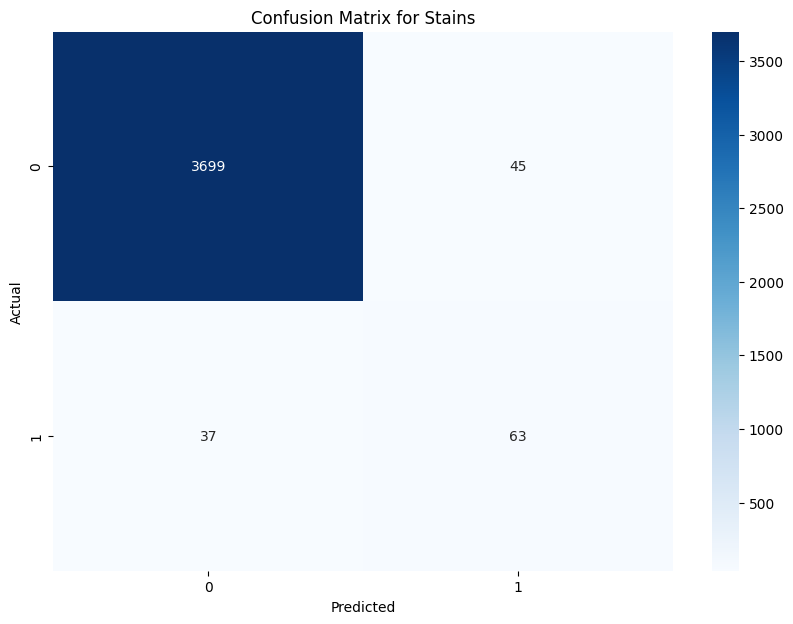

Classification Report for Stains:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3744
           1       0.58      0.63      0.61       100

    accuracy                           0.98      3844
   macro avg       0.79      0.81      0.80      3844
weighted avg       0.98      0.98      0.98      3844



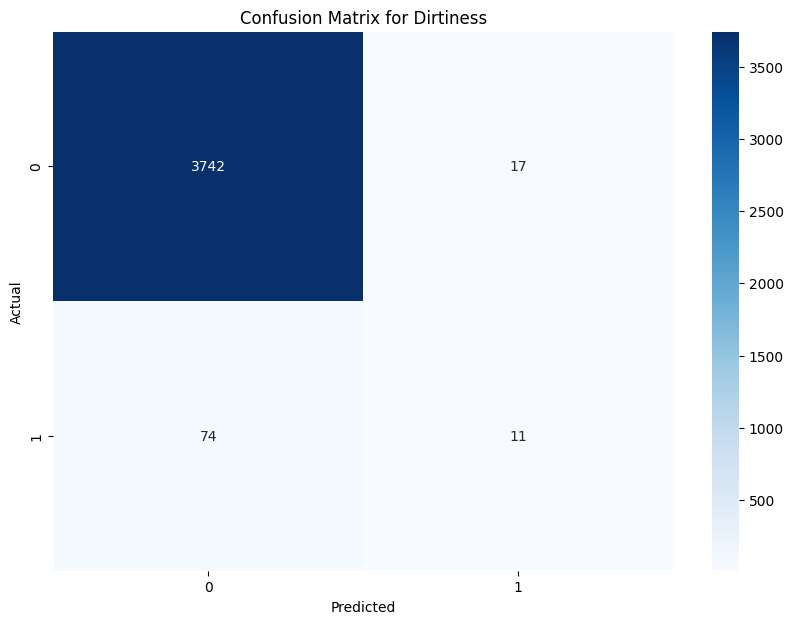

Classification Report for Dirtiness:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3759
           1       0.39      0.13      0.19        85

    accuracy                           0.98      3844
   macro avg       0.69      0.56      0.59      3844
weighted avg       0.97      0.98      0.97      3844



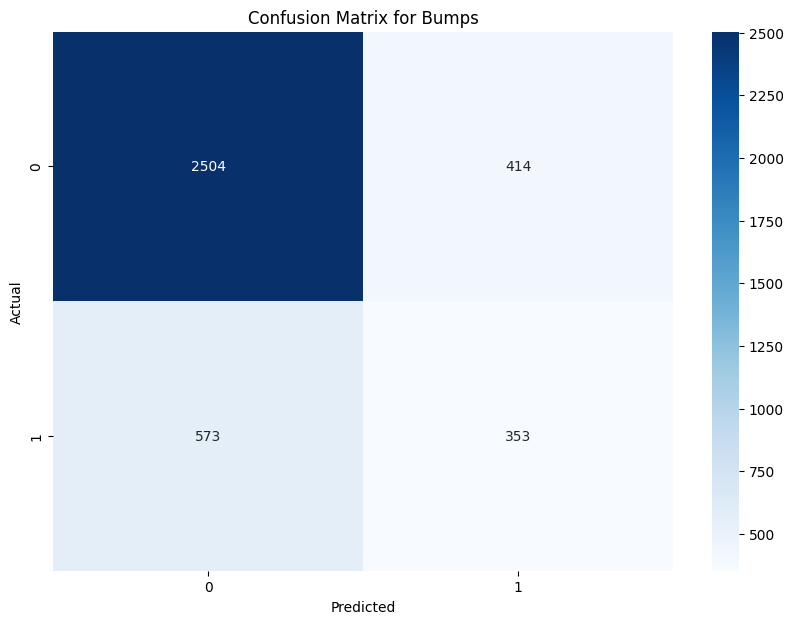

Classification Report for Bumps:

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      2918
           1       0.46      0.38      0.42       926

    accuracy                           0.74      3844
   macro avg       0.64      0.62      0.63      3844
weighted avg       0.73      0.74      0.73      3844



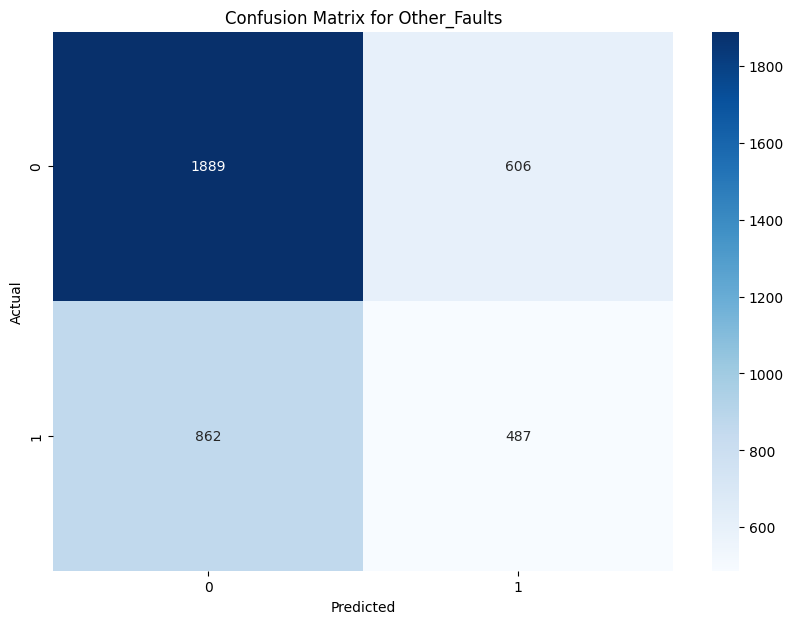

Classification Report for Other_Faults:

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      2495
           1       0.45      0.36      0.40      1349

    accuracy                           0.62      3844
   macro avg       0.57      0.56      0.56      3844
weighted avg       0.60      0.62      0.61      3844



In [28]:
# Generate and visualize confusion matrices for each target class
classes = y.columns

for i, class_name in enumerate(classes):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {class_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print classification report
    print(f'Classification Report for {class_name}:\n')
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


In [29]:
pred = model.predict(X_test)
pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [30]:
proba = model.predict_proba(X_test)
proba

[array([[0.8, 0.2],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [0.6, 0.4],
        [0.6, 0.4],
        [1. , 0. ]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1., 0.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [0.8, 0.2],
        [0.8, 0.2],
        [1. , 0. ]]),
 array([[1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [0.4, 0.6],
        [1. , 0. ],
        [1. , 0. ]]),
 array([[0.8, 0.2],
        [0.8, 0.2],
        [0.2, 0.8],
        ...,
        [0.6, 0.4],
        [0.8, 0.2],
        [0.8, 0.2]])]

In [31]:
#import joblib

In [39]:
# Save the best model using joblib
#joblib.dump(model.best_estimator_, 'steel_plate_defect_model_1_1.joblib')